<a href="https://colab.research.google.com/github/aryan-shukal/Data-Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import Required Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ***Load the Dataset***

In [ ]:
# Load the dataset
netflix_df = pd.read_csv('/content/netflix1.csv')

# Display the first few rows of the dataset
netflix_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# ***Data Cleaning***

In [ ]:
# Check for missing values
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
# Remove duplicates
netflix_df.drop_duplicates(inplace=True)

In [ ]:
# Handle missing values: Fill 'director' and 'country' columns with 'Unknown' where missing
netflix_df['director'].fillna('Unknown', inplace=True)
netflix_df['country'].fillna('Unknown', inplace=True)

<ipython-input-6-ce796ed658d2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_df['director'].fillna('Unknown', inplace=True)
<ipython-input-6-ce796ed658d2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# Convert 'date_added' to datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

In [ ]:
# Display the cleaned data info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


## ***EXPLORATORY DATA ANALYSIS (EDA)***

<ipython-input-9-3dacbf3c93a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, x='type', palette='Set2')


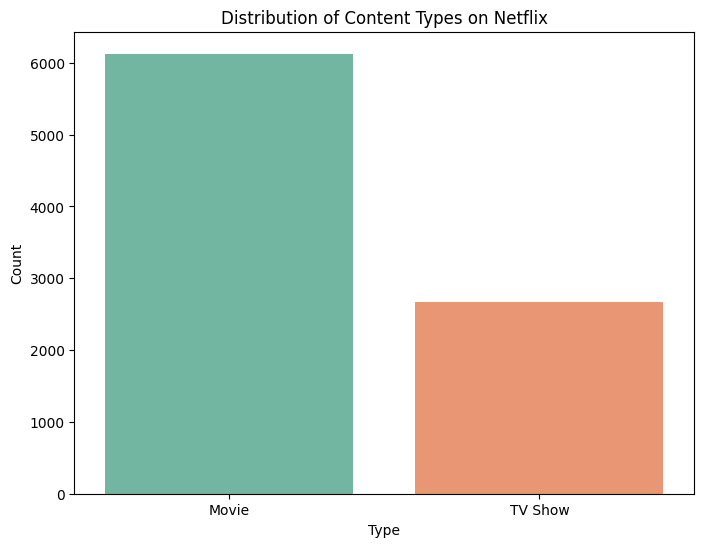

In [ ]:
# Countplot of content types
plt.figure(figsize=(8, 6))
sns.countplot(data=netflix_df, x='type', palette='Set2')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

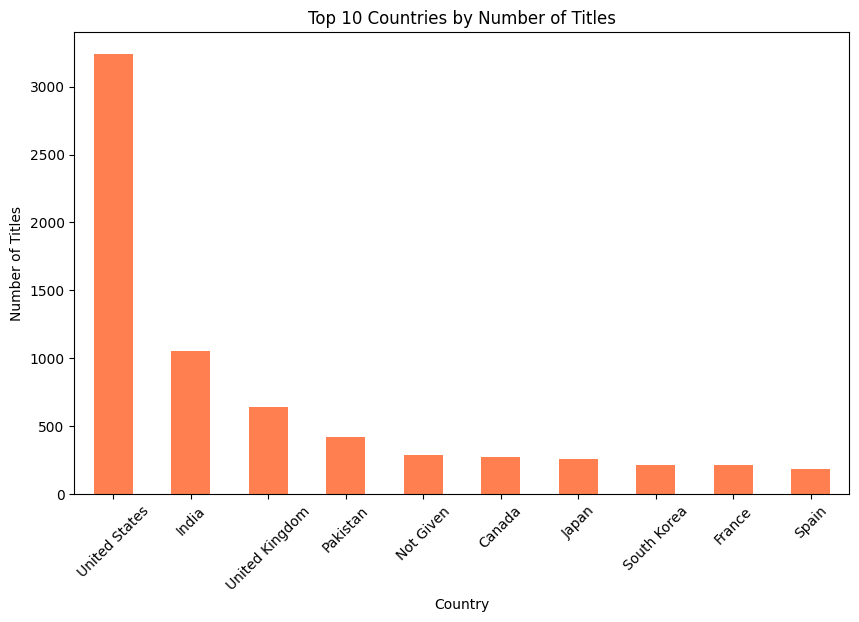

In [ ]:
# Count of content by country (Top 10)
top_countries = netflix_df['country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

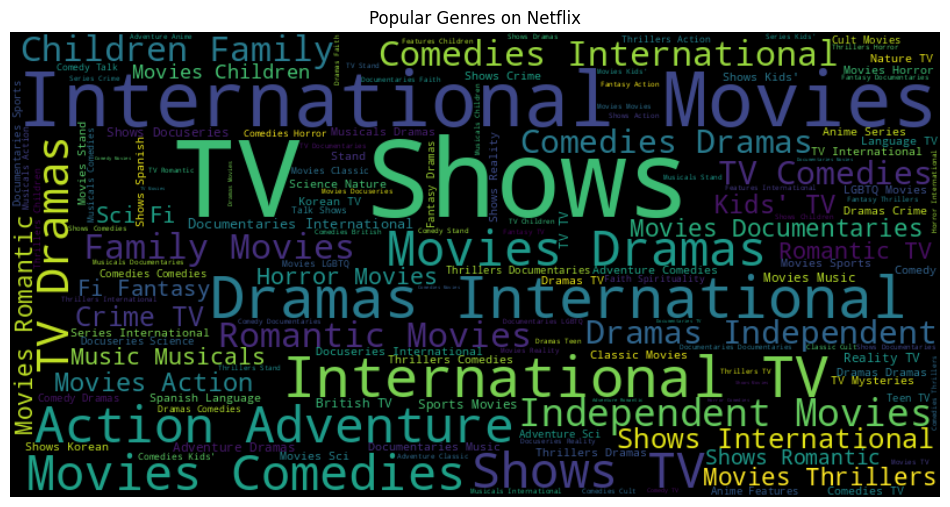

In [ ]:
# Generate a word cloud for genres

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(netflix_df['listed_in']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Genres on Netflix')
plt.show()

<ipython-input-13-e3d25a1d3958>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, x='year_added', palette='coolwarm', order=sorted(netflix_df['year_added'].dropna().unique()))


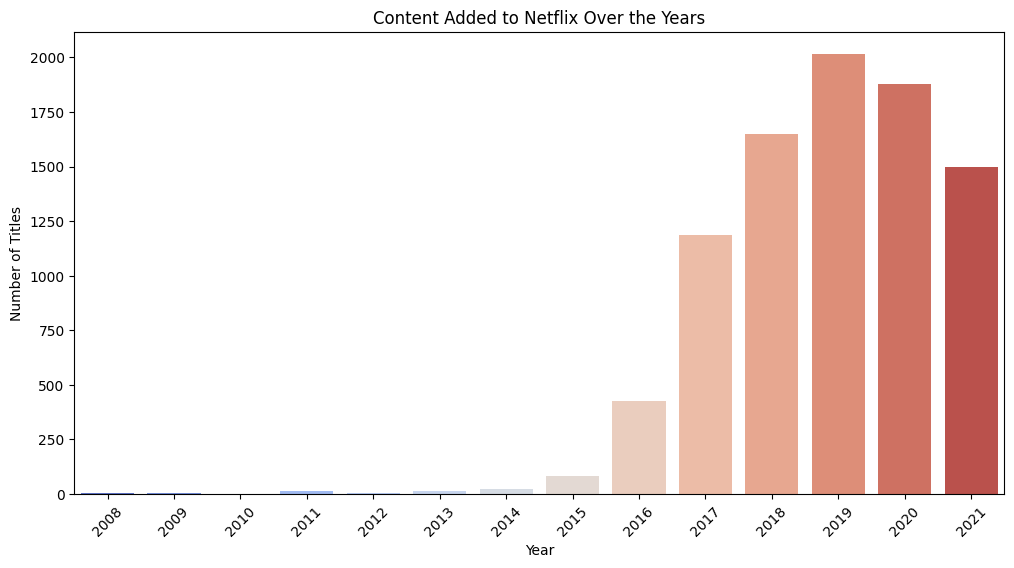

In [ ]:
# Content added over time
netflix_df['year_added'] = netflix_df['date_added'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_df, x='year_added', palette='coolwarm', order=sorted(netflix_df['year_added'].dropna().unique()))
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

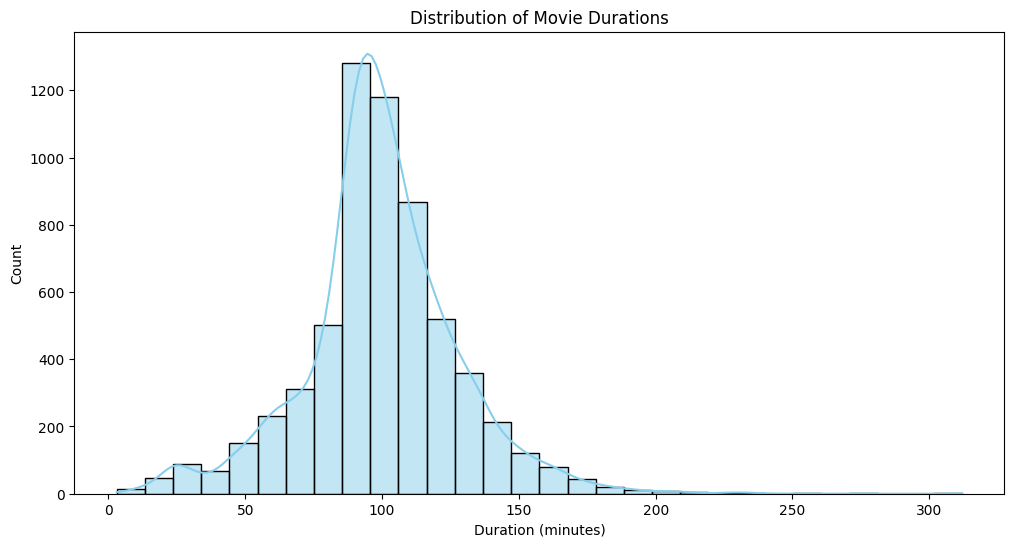

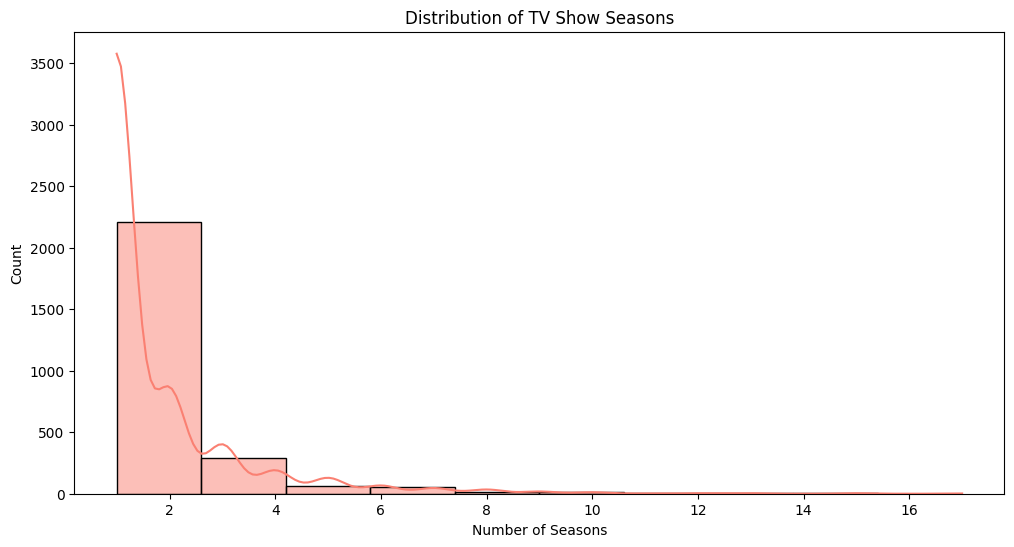

In [ ]:
# Separate duration into minutes for movies and seasons for TV Shows
netflix_df['duration_int'] = netflix_df['duration'].str.extract('(\d+)').astype(int)

# Duration distribution for Movies
plt.figure(figsize=(12, 6))
sns.histplot(data=netflix_df[netflix_df['type'] == 'Movie'], x='duration_int', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Duration distribution for TV Shows
plt.figure(figsize=(12, 6))
sns.histplot(data=netflix_df[netflix_df['type'] == 'TV Show'], x='duration_int', kde=True, color='salmon', bins=10)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()


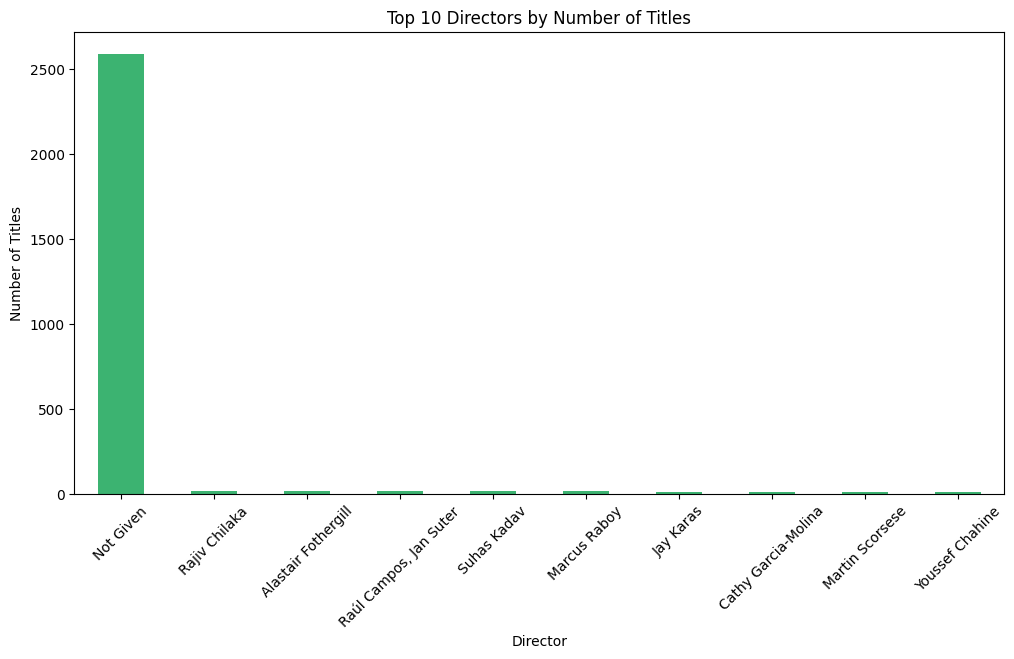

In [ ]:
# Top 10 Directors by Number of Titles
top_directors = netflix_df['director'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-38f476e131b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, x='rating', palette='viridis', order=netflix_df['rating'].value_counts().index)


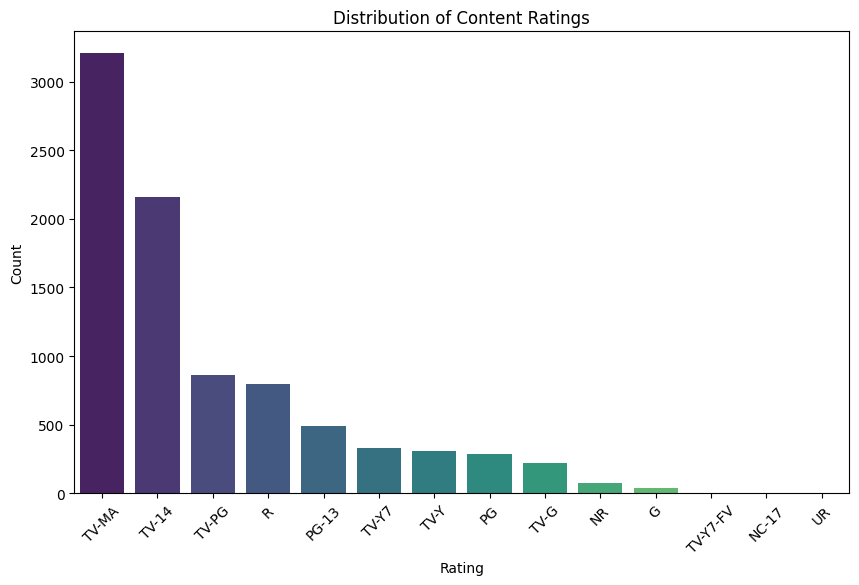

In [ ]:
# Distribution of Content Ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_df, x='rating', palette='viridis', order=netflix_df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

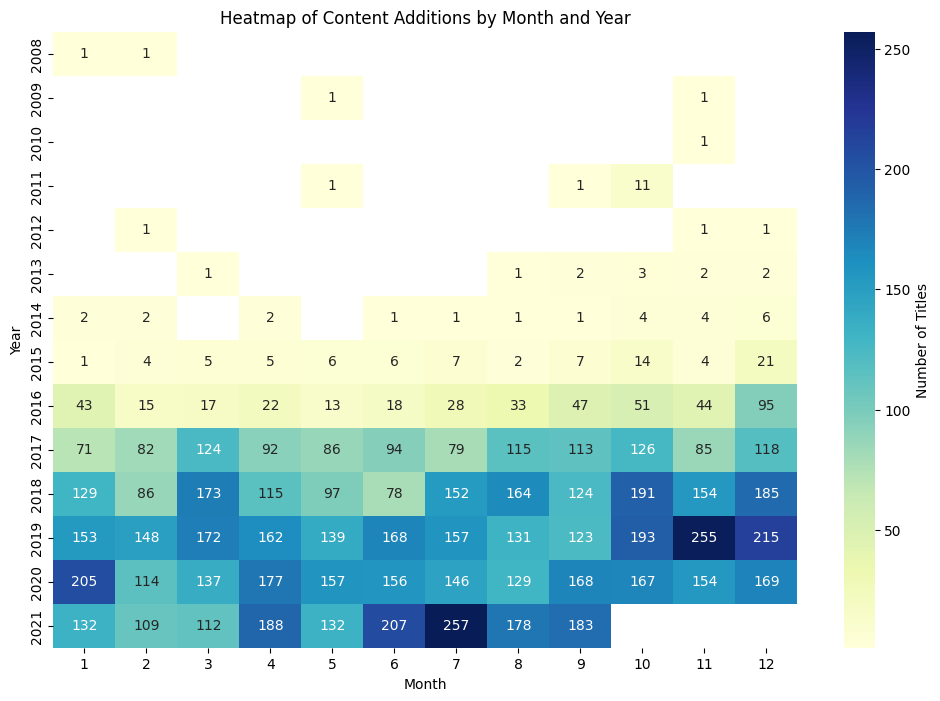

In [ ]:
# Extract month and year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

# Pivot table to get counts by year and month
heatmap_data = netflix_df.pivot_table(index='year_added', columns='month_added', values='show_id', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Number of Titles'})
plt.title('Heatmap of Content Additions by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# ***Conclusion and Insights***

Based on the exploratory data analysis, here are some key insights derived from the Netflix dataset:


##1. Content Type Distribution:
   
*  Netflix hosts both movies and TV shows, with movies slightly outnumbering TV shows. This suggests that movies form a significant part of Netflix's library, but there is also a solid offering of TV content to meet user demand.


##2. Country-wise Content Distribution:

*   The United States, India, and the United Kingdom produce the most content on Netflix, indicating a high representation of content from Western and South Asian regions.

*   This distribution also reflects Netflix's expansion strategy, focusing on content that resonates with audiences in these countries.


##3. Popular Genres:
   
*  Word cloud and genre trend analysis show that genres like "International TV Shows," "Dramas," and "Comedies" are highly popular. This trend suggests that Netflix’s audience values a mix of international and genre-diverse content.

##4. Content Addition Trends Over Time:

*   Content additions have grown significantly over recent years, with peaks at certain times, possibly reflecting Netflix’s strategy to release new content around key times of the year.
*   Monthly analysis reveals patterns in content additions, with some months showing higher release rates, possibly around holidays or popular streaming seasons.

##5. Duration Analysis for Movies and TV Shows:

*    Movie durations are typically around 90–120 minutes, catering to standard movie lengths, while TV shows have a significant number of single-season series, likely due to Netflix’s experimental approach with limited-series formats.

##6. Top Directors and Content Ratings:

*   Analysis of top directors reveals several frequently featured creators, indicating Netflix's partnerships with prominent directors.
*   Content ratings skew towards mature audiences (TV-MA, R), which aligns with Netflix’s reputation for catering to adult viewers. However, there is still substantial content for general audiences, providing a balanced viewing experience.


##7. Genre Popularity Over Time:

*   Certain genres, especially crime and thriller genres, have become more popular over recent years, indicating a shift in viewer preference or a targeted push by Netflix for these genres.
*   Dramas and international genres remain consistently popular, reflecting an ongoing demand for diverse and globally appealing content.






















